# **Librerías**

In [ ]:
#Instalar la versión 0.11.1 (o mayor) de Seaborn, necesaria para ejecutar este script
#!pip install seaborn --upgrade

In [ ]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
#import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

#Necesarias para PCA
# ==============================================================================
import statsmodels.api as sm
#import statsmodels.formula.api as smf

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Calculo de chi cuadrado
# ==============================================================================
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

#from datetime import datetime

#from scipy import misc


#from funpymodeling.exploratory import status, freq_tbl, profiling_num



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


# **Data set (subida e información general)**

In [ ]:
df_attrition=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/attrition_data.csv",encoding='cp1252',index_col='id1')

In [ ]:
df_attrition.tail()

In [ ]:
df_attrition.head()

In [ ]:
#Obtenemos el numero de filas y el numero de columnas del dataset
df_attrition.shape

In [ ]:
#Obtenemos las columnas y el tipo
df_attrition.info()

In [ ]:
# Las variables involucradas son:
#  id1: Identificador del registro
#  ID: segundo identificador del registro (pero se repite, asi que no lo tomamos como identificador)
#  Name: nombre del empleado (está blureado)
#  ProjectName: Proyectos en donde trabajó el empleado
#  Location: Lugar de trabajo del empleado (categórica)
#  Capability: Tecnologías con la cual trabaja?
#  JobLevel: Categoría del empleado (categórica)
#  PerformanceRating: Performance (categórica / ordinal)
#  ProficiencyLevel: Nivel de competencia (categorica / ordinal / Tienes 2490 filas con valores vacíos)
#  PromotionElegibility: Elegibilidad (categórica / Tienes 6229 filas con valores vacíos)
#  PromotionOutcome: Resultado de la promoción (categórica / Tienes 2 filas con valores vacíos)
#  CareerLevel: Nivel de carrera (coinciden con los valores de columna Job Level)
#  MonthsHired: Cantidad de meses contratados (numérica)
#  CompRatio: Tasa??? (numérica)
#  LastPromotionDate: Ultima fecha de promoción (fecha)
#  MonthAtLevel: desde cuando esta en el cargo (numérica)
#  Gender: Genero (categórica)
#  Age: Edad (numérica)
#  Locationpreference: Lugar a donde le gustaría trabajar el empleado
#  ExitMonth: Mes de egreso (categorica, pero la mayoría de las filas no tienen datos)
#  EducationalQualification_: Nivel educativo (categórica)
#  Onboard_or_Exit: variable objetivo (categórica)

# **Primeras transformaciones de variables (nulos)**

In [ ]:
# Generamos una función para mostrar las frecuencias

def view_freq_column(column_name):
    print('-----------------------------------------------------------')
    print('  Análisis de frecuencia columna: [' + column_name + ']:')
    print('-----------------------------------------------------------')
    print(pd.value_counts(df_attrition[column_name],dropna=False))
    
def diff_days(date1, date2):
    dif_date = date2-date1
    return dif_date.days

In [ ]:
# Verificamos si las columnas que tienen N/A
df_attrition.isna().sum()

ID                               0
Name                             0
ProjectName                      0
Location                         0
Capability                       0
JobLevel                         0
PerformanceRating                0
ProficiencyLevel              2490
PromotionEligibility          6229
PromotionOutcome                 2
CareerLevel                      0
MonthsHired                      0
CompRatio                        0
LastPromotionDate                0
MonthAtLevel                     0
Gender                           0
Age                              0
Locationpreference               0
ExitMonth                    33794
EducationalQualification_        0
Onboard_or_Exit                  0
dtype: int64

In [ ]:
print('\n valores de: Proficency', df_attrition.ProficiencyLevel.value_counts())


 valores de: Proficency P3 - Advanced      10631
P2 - Proficient     9594
P1 - Novice         5875
P0 - Trained        3487
P4 - Expert         3478
Name: ProficiencyLevel, dtype: int64


In [ ]:
# Procedemos a poner un valor por defecto a los valores vacíos en las tres columnas:
# ProficiencyLevel              2490
# PromotionEligibility          6229
# PromotionOutcome                 2

df_attrition.fillna({'ProficiencyLevel': 'p5 - unknown'}, inplace=True)
df_attrition.fillna({'PromotionEligibility': 'unknown'}, inplace=True)
df_attrition.fillna({'PromotionOutcome': 'none'}, inplace=True)


# **Primer EDA**

In [ ]:
#Visualizar datos estadísticos como percentiles, media, desviación estándard, etc.
df_attrition.describe()

,ID,MonthsHired,CompRatio,MonthAtLevel,Age
count,35555.000000,35555.000000,35555.000000,35555.000000,35555.000000
mean,6711.458163,61.345184,0.956795,36.975868,29.705583
std,4226.177520,25.511501,0.078788,22.386320,4.574621
min,1.000000,19.000000,0.490000,2.000000,20.000000
25%,3171.000000,39.000000,0.930000,17.000000,26.000000
50%,6348.000000,59.000000,0.950000,33.000000,29.000000
75%,9847.500000,79.000000,1.000000,50.000000,33.000000
max,16533.000000,151.000000,1.810000,136.000000,54.000000


In [ ]:
#Obtenemos la cantidad de empleados que se fueron de la compañia y la cantida de empleados que se quedan
#Esto es la variable objetivo
#Como vemos, el dataset está muy desbalanceado
freq = df_attrition['Onboard_or_Exit'].value_counts()
print(freq)
perc_freq = "{:.2%}".format(1-freq[1]/(freq[0]+freq[1]))
print("La cantidad de Ex/Resig sobre el total es de", perc_freq)


Onboard     33794
Ex/Resig     1761
Name: Onboard_or_Exit, dtype: int64
La cantidad de Ex/Resig sobre el total es de 95.05%


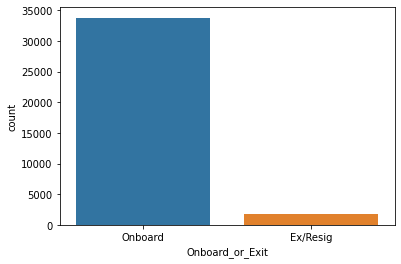

In [ ]:
# Armamos un gráfico de distribución
sns.countplot(x="Onboard_or_Exit",data=df_attrition)

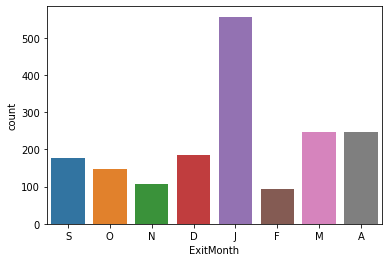

In [ ]:
# Verificamos como es la distribución de ExitMonth en el grupo en la clase de los que se fueron
sns.countplot(x="ExitMonth",data=df_attrition)


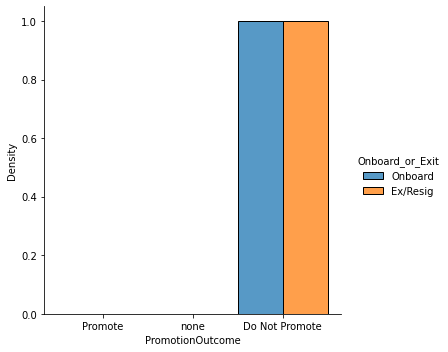

In [ ]:
# Verificamos con PromotionOutcome
ax = sns.displot(df_attrition, x="PromotionOutcome", hue="Onboard_or_Exit", stat="density", common_norm=False, multiple="dodge")

# Vemos que la variable tiene el 99,98% de los valores en la clase "DO NOT PROMOTE" con lo cual tambien la eliminamos del dataset

# **Segunda Transformación de variables (Formatos de datos y eliminación de columnas)**

In [ ]:
# -------------------------
# Transformación de datos:
# -------------------------

# 1 - Eliminamos la columna ExitMonth porque no tienen datos
df_attrition.drop('ExitMonth', axis=1, inplace=True) #La eliminamos porque no se pueden desambiguar los mese de J, A, M

# 2 - Generamos una columna que calcule si la preferencia de locación respecto a la locación es la misma
# 2.a - hay que tranformar en el campo Locationpreference los valores "Kolkata (to" a "Kolkata")
df_attrition.Locationpreference = df_attrition.Locationpreference.replace({"Kolkata (to": "Kolkata"})
# 2.b - se genera una columna auxiliar RequestLocationChange (valores 'Yes' o 'No')
df_attrition['RequestLocationChange'] = np.where(df_attrition['Location'] != df_attrition['Locationpreference'], 'Yes', 'No')
# 2.c - se elimina la columna Locationpreference
df_attrition.drop('Locationpreference', axis=1, inplace=True)

# 3.a - se convierte columna LastPromotionDate a fecha
# df_attrition['LastPromotionDate_d'] = df_attrition['LastPromotionDate'].apply((lambda x: datetime.strptime(x), "%m/%d/%Y"))
df_attrition['LastPromotionDate'] = df_attrition['LastPromotionDate'].apply((lambda x: pd.to_datetime(x, format="%m/%d/%Y")))
# 3.b - Se genera columna con cantidad de dias desde última promoción (DaysLastPromotion). Se utiliza como referencia 31/12/2019
df_attrition['DaysLastPromotion'] = df_attrition['LastPromotionDate'].apply((lambda x: diff_days(x, pd.to_datetime("today"))))
# 3.c - Se elimina columna LastPromotionDate
df_attrition.drop('LastPromotionDate', axis=1, inplace=True)

# 4 - Generamos una columna Onboard_or_Exit_bin tipo categórica binaria (0=Onboard, 1=Ex/Resig), a partir de la columna Onboard_or_Exit
df_attrition['Onboard_or_Exit_bin'] = np.where(df_attrition['Onboard_or_Exit'] == 'Onboard', 0, 1)

# 5 - Se eliminan las columnas Onboard_or_Exit, Name, ID, y ExitMonth, PromotionOutcome
df_attrition.drop('Onboard_or_Exit', axis=1, inplace=True)
df_attrition.drop('Name', axis=1, inplace=True)
df_attrition.drop('ID', axis=1, inplace=True)
df_attrition.drop('PromotionOutcome', axis=1, inplace=True)


# 6 - Transformaciones varias
# Education - muchos valore posibles, agrupamos segun categoria
df_attrition.loc[df_attrition.EducationalQualification_.isin(['Master of Accounting',
 'Bachelor of Commercial Science', 'Master of Social Work', 'Master of Finance and Controls',
 'Master in Human Resource Management', 'Cost and Works Accountant',
 'Bachelor of Corporate Secretaryship',  'Doctor of Science', 'Doctor of Business Admin',
'Bachelor of Science', 'Bachelor of Commerce', 'Master of Science', 'Master of Business Admin',
'Bachelor of Business Admin', 'Bachelor of Business Management', 'Master of Management Studies',
'Bachelor of Economics', 'Master of Financial Management', 'Master of Commerce']),'EducationalQualification_']='Businnes/Econ/Socials'

df_attrition.loc[df_attrition.EducationalQualification_.isin(['Associate of Engineering',
'Master of Mechanical Engineer', 'Master of Civil Engineering', 'Bachelor of Engineering',
'Master of Engineering', 'Bachelor of Mathematics']),'EducationalQualification_']='Engineering'

df_attrition.loc[df_attrition.EducationalQualification_.isin(['Bachelor of Technology',
'BCA (Bachelor of Computer Application)', 'Master of Computer Application', 
'Bachelor of Computer', 'Master of Technology', 'Master in Computer Science',
'Master of Computer Science', 'Master in Information Technology', 'Bachelor of Computer Studies']),'EducationalQualification_']='IT'

df_attrition.loc[df_attrition.EducationalQualification_.isin([ 'Bachelor of Textile Technology',
'Local Degree', 'Bachelor of Architecture', 'Certificate', 'Associate of Science', 'Other Local Degree',
'Diploma in Business', 'Diploma in Hotel Management', 'Advanced Level', 'Honorary Degree',
'High School Graduate', 'Bachelor of Fine Arts', 'Diploma', 'Other Graduate Degree',
'Bachelor of Arts', 'Studies', 'other', 'Bachelor', 'Bachelor of Theology', 
'Bachelor of Arts Honors', 'Other', 'Chartered Accountant', 'Master of Education',
'Bachelor of Hotel Management', 'Master of Arts','Bachelor of Law', 'Bachelor of Dental Studies',
'Doctor of Medicine', 'Bachelor of Nursing', 'Bachelor of Pharmacy']),'EducationalQualification_']='Oher'

df_attrition.EducationalQualification_ = df_attrition.EducationalQualification_.str.upper()

df_attrition['ProficiencyLevel'] = df_attrition['ProficiencyLevel'].str.upper()

df_attrition['PromotionEligibility'] = df_attrition['PromotionEligibility'].str.upper()

df_attrition['Location'] = df_attrition['Location'].str.upper()


#capability: tiene 129 valores posibles
#se agrupa en tres variables, segun frecuencia: <10 - <200 - <500 <1000 - >1000

df_attrition.loc[df_attrition.Capability.isin(['Tech Research/Innovation', 'IBM Skills', 'CMT-EHT',
'Development Technologies', 'Integrated Marketing',
'Customer Analytics', 'Enterprise Perfmnc Mgmt', 'CMT-M&E',
'Other Vendor Products', 'Core', 'PRD-Consumer Goods & Services',
'PRD-Retail', 'HR Service Delivery', 'Health & Life Sciences', 'H&PS',
'RES', ' Methods/Tools', 'Pharmaceuticals Processes',
'Assets & Offering Mgmt', 'Supply Chain & Operations',
'Finance Services & Admin', 'BMC', 'Customer Service', 'Sun',
'Business Operations', 'RES-Natural Resources', 'Insurance Processes',
'Open Source', 'Informatica', 'Utilities', 'Interwoven',
'Media and Entertainment', 'RES-Chemicals', 'HR and Talent Management',
'FS', 'Consumer Goods & Services', 'Commercial Management',
'PRD-Air, Freight & Logistics and', 'Customer Service Delivery',
'Adobe', 'Organization Management', 'Electronics & High Tech',
'Pegasystems', 'Natural Resources', 'Callidus', 'Energy',
'RES-Utilities', 'CA', 'Marketing Serv Delivery', 'Retail',
'Customer Strategy & Arch', 'Growth Strategy', 'Research',
'SAP-SCM-Planning & Logistics Ski', 'SAP-Technology Skills', 'BEA',
'Google', 'Healthcare Processes', 'Operational Strategy',
'Corp. Strategy & Growth', 'SAP-Solution Extensions Skills',
'WebSphere Skills', 'H&PS-Defense/Pub Safety', 'Source To Pay Services',
'EMC', 'Microsoft Platform Skills', 'Res&LifeCycMgmt', 'Omniture',
'Chemicals', 'Industrial Equipment', 'Apache', 'Technical',
'Automotive', 'Finance Accounting Operations Ex']),'Capability']='lowf' #<10

df_attrition.loc[df_attrition.Capability.isin(['Industry Applications-HPS', 'Cloud Computing',
'Service Mobilization', 'H&PS-Health','Industry Applications-PRD'
'User Experience', 'CMT-Communications', 'IT Strat & Transformation','Sales Execution',
'Learning & Collaboration', 'Sales', 'Marketing', 'IT Service Excellence', 'Insurance',
'JD Edwards', 'Application Modernization', 'FS-Banking', 'Capital Markets', 
'RES-Energy', 'Communications', 'FS-Capital Markets', 'Health', 'PRD-Life Sciences',
'Language', 'Performance Engineering', 'Banking', 'CMT', 'Industry Applications-PRD', 'User Experience',
'Service Management', 'Microsoft Business Apps', 'Quality', 'Industry Applications-FS', 'Industry Applications-RES',
'FS-Insurance']),'Capability']='lowf_plus'#<200

df_attrition.loc[df_attrition.Capability.isin([ 'Workplace & Collaboration',
'Industry Applications-CMT', 'Digital Soln & Web Arch', 'Network & Communications', 
'Delivery Lifecycle', 'C/C++', 'Data Center', 'Security & Risk', 'PeopleSoft', 'Industry Applications']),'Capability']='medf' #<500

df_attrition.loc[df_attrition.Capability.isin(['Delivery Management', 'Functional Applications']), 'Capability'] = 'medf_plus' #<1000
df_attrition['Capability'] = df_attrition['Capability'].str.upper()

#career label
#para los valores ACCE y SREX tiene muy poco representatividad en proporcion a los demas
#procedemos a agruparlos
df_attrition.replace(
    to_replace = {'ACCE': 'ACCE-SREX', 'SREX': 'ACCE-SREX'},
    inplace = True
)

#project Name
#es extremadamente cardinal, lo eliminamos
df_attrition.drop(labels = 'ProjectName',
                  axis = 1,
                  inplace = True)

In [ ]:
# Mostramos las frecuencias de todas las columnas
for column in df_attrition:
    if (column != 'ID' and column != 'ProjectName' and column != 'Name' and column != 'DaysLastPromotion' and column != 'MonthsHired' and column != 'CompRatio' and column != 'MonthAtLevel' and column != 'Age' and column != 'DaysLastPromotion'):
        view_freq_column(column)

-----------------------------------------------------------
  Análisis de frecuencia columna: [Location]:
-----------------------------------------------------------
BANGALORE    16271
MUMBAI        5278
HYDERABAD     4286
CHENNAI       4109
PUNE          2968
GURGAON       2451
KOLKATA        192
Name: Location, dtype: int64
-----------------------------------------------------------
  Análisis de frecuencia columna: [Capability]:
-----------------------------------------------------------
SAP                         6293
TESTING                     5354
MICROSOFT PLATFORM          4048
MEDF                        3283
JAVA TECHNOLOGY PLATFORM    2983
INFORMATION MANAGEMENT      2633
ORACLE                      2331
LOWF_PLUS                   1733
PPSM                        1664
HOSTCENTRIC PLATFORM        1547
TECHNOLOGY ARCHITECTURE     1289
MEDF_PLUS                   1191
SIEBEL                      1018
LOWF                         188
Name: Capability, dtype: int64
-----------

In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
pd.DataFrame(df_attrition, columns = ['MonthsHired','MonthAtLevel','CompRatio','Age','DaysLastPromotion']).mean(axis=0)

----------------------
Media de cada variable
----------------------


MonthsHired            61.345184
MonthAtLevel           36.975868
CompRatio               0.956795
Age                    29.705583
DaysLastPromotion    2505.474532
dtype: float64

In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
pd.DataFrame(df_attrition, columns = ['MonthsHired','MonthAtLevel','CompRatio','Age','DaysLastPromotion']).var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


MonthsHired             650.836659
MonthAtLevel            501.147305
CompRatio                 0.006208
Age                      20.927154
DaysLastPromotion    175310.161380
dtype: float64

# **Segundo EDA**

In [ ]:
# Analizamos el comportamiento de algunas variables, como edad, sexo, y antiguedad
# También analizamos la variable Monthhired
# en los grupos que se quedan vs los grupos que se van

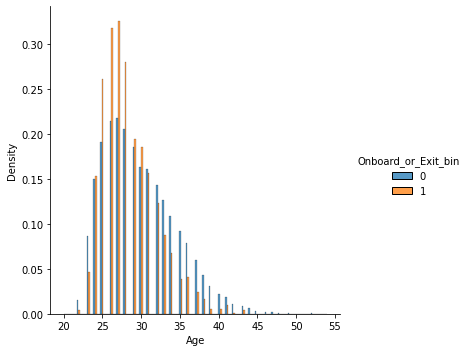

In [ ]:
# Empezamos con edad
sns.displot(df_attrition, x="Age", hue="Onboard_or_Exit_bin", stat="density", common_norm=False, multiple="dodge")


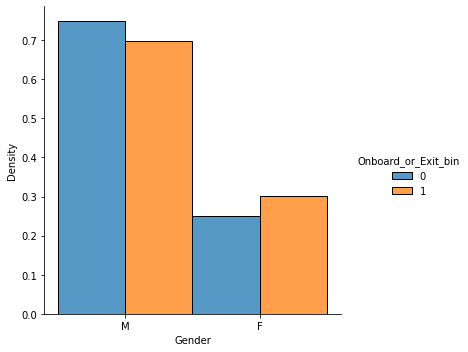

In [ ]:
# Seguimos con el sexo
ax = sns.displot(df_attrition, x="Gender", hue="Onboard_or_Exit_bin", stat="density", common_norm=False, multiple="dodge")

In [ ]:
# Como se ve, ambas variables tienen aproximadamente la misma distribución para ambas clases (los que se va y lo que se quedan)

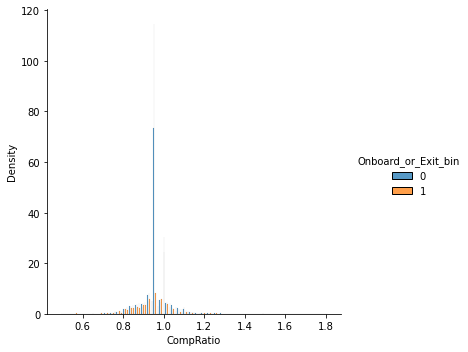

In [ ]:
# Verificamos con compRatio

ax = sns.displot(df_attrition, x="CompRatio", hue="Onboard_or_Exit_bin", stat="density", common_norm=False, multiple="dodge")

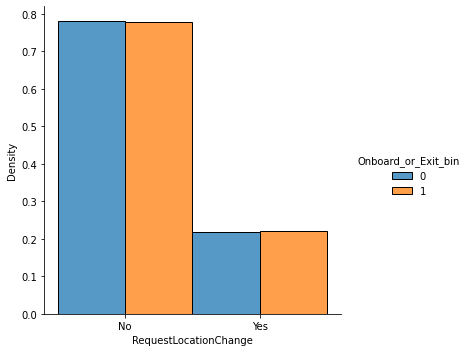

In [ ]:
# Verificamos con RequestLocationChange

ax = sns.displot(df_attrition, x="RequestLocationChange", hue="Onboard_or_Exit_bin", stat="density", common_norm=False, multiple="dodge")

# **Analisis de dependencia entre variables**

## Variables Cuantitativas (punto bi-serial)

p_value para variable [ 0 - MonthsHired ] es: 0.014667745235732377  y es  DEPENDIENTE de Onboard_or_exi
p_value para variable [ 1 - MonthAtLevel ] es: 1.5449045193001009e-28  y es  DEPENDIENTE de Onboard_or_exi
p_value para variable [ 2 - CompRatio ] es: 0.1557476190966168  y es  independiente de Onboard_or_exit
p_value para variable [ 3 - Age ] es: 2.9859378760591845e-32  y es  DEPENDIENTE de Onboard_or_exi
p_value para variable [ 4 - DaysLastPromotion ] es: 6.441338165638432e-126  y es  DEPENDIENTE de Onboard_or_exi


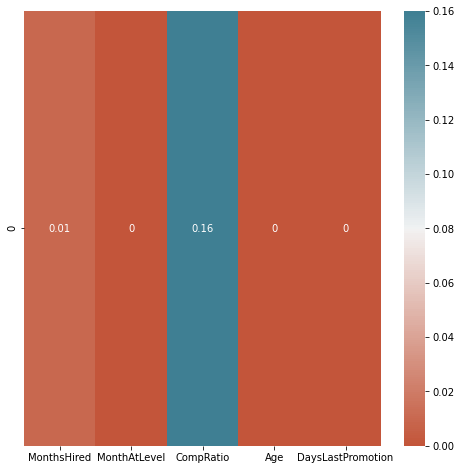

In [ ]:
# -------------------------
# Analisis bi-variado
# Variables cuanlitativas
# -------------------------

# Calculamos la correlación punto-biserial para cada una de las columnas cuantitativas versus la columna de resultado
# Para eso previamente convertimos la columna Onboard_or_exit en binaria (0 o 1)
# Se utiliza una hipótesis de independencia
# H0 = Sí hay independencia entre las variables (p>0,05) 
# H1 = No hay independencia entre las variables (p<0,05), o bien las variables son dependientes.
fig = plt.subplots(figsize = (8,8))

def p_value_calc(column1, column2):
    correlation, p_value = pointbiserialr(df_attrition[column2].values, df_attrition[column1].values)
    return p_value

# Generamos un vector con los nombres de las columnas
columnas_numericas = ['MonthsHired','MonthAtLevel','CompRatio', 'Age','DaysLastPromotion']

cant_columnas_numericas = len(columnas_numericas)

# Generamos un vector para cada una de las variables
m_values= np.ones((1,cant_columnas_numericas)) # Vector de unos

# Llenamos la matriz con las frecuencias
for c in range(0,cant_columnas_numericas):
    columna = columnas_numericas[c]
    m_values[0,c] = round(p_value_calc(columna, 'Onboard_or_Exit_bin'),2)

sns.heatmap(m_values, annot=True, xticklabels = columnas_numericas, cmap = sns.diverging_palette(20, 220, n=200))
        
# Mostramos las frecuencias de todas las columnas
for f in range(0,cant_columnas_numericas):
    column = columnas_numericas[f]
    #print(df_attrition[column].values)
    p_value = p_value_calc(column, 'Onboard_or_Exit_bin')
    if (p_value > 0.05):
        resultado_p_value = 'independiente de Onboard_or_exit'
    else:
        resultado_p_value = 'DEPENDIENTE de Onboard_or_exi'

    print('p_value para variable [', f , '-', column, '] es:', p_value, ' y es ', resultado_p_value)

    
# Se observa que todas las variables categóricas excepto ['RequesLocationChange'] y ['PromotionOutcome'] dependientes
# de la variable objetivo ['OnBoard_or_exit']

## Variables Cualitativas (chi cuadrado)

p (chi-cuadrado) para variable [ 1 - Location ] es: 0.00980981573097441  y es  DEPENDIENTE de Onboard_or_exi
p (chi-cuadrado) para variable [ 2 - Capability ] es: 6.139699045321579e-12  y es  DEPENDIENTE de Onboard_or_exi
p (chi-cuadrado) para variable [ 3 - JobLevel ] es: 3.09457650219644e-61  y es  DEPENDIENTE de Onboard_or_exi
p (chi-cuadrado) para variable [ 4 - PerformanceRating ] es: 0.023345323620421302  y es  DEPENDIENTE de Onboard_or_exi
p (chi-cuadrado) para variable [ 5 - ProficiencyLevel ] es: 0.0  y es  DEPENDIENTE de Onboard_or_exi
p (chi-cuadrado) para variable [ 6 - PromotionEligibility ] es: 5.6758877292079876e-12  y es  DEPENDIENTE de Onboard_or_exi
p (chi-cuadrado) para variable [ 7 - CareerLevel ] es: 3.09457650219644e-61  y es  DEPENDIENTE de Onboard_or_exi
p (chi-cuadrado) para variable [ 8 - Gender ] es: 1.59300309458372e-06  y es  DEPENDIENTE de Onboard_or_exi
p (chi-cuadrado) para variable [ 9 - EducationalQualification_ ] es: 1.9119920329010783e-12  y es  DEPE

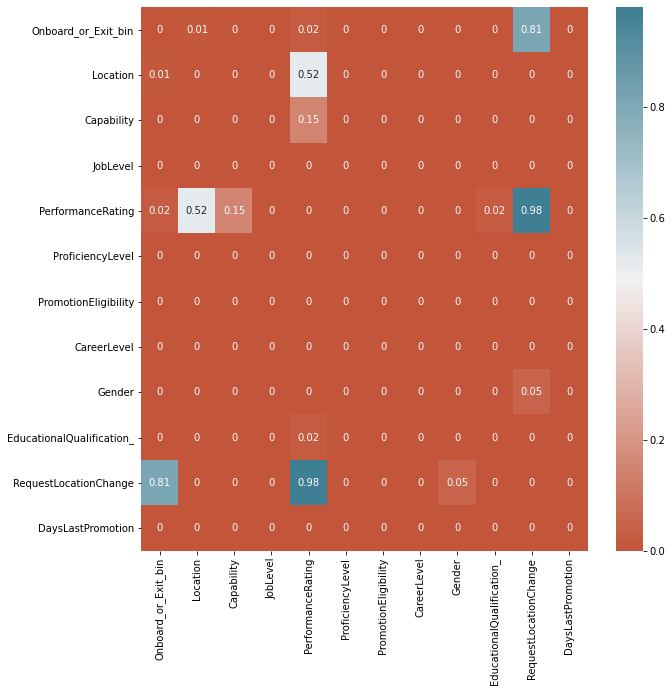

In [ ]:
# -------------------------
# Analisis bi-variado
# Variables cualitativas
# -------------------------

# Realizamos un análisis bi-variado chi-cuadrado contra la variable objetivo

# La prueba de chi-cuadrado de Pearson contrasta si las diferencias observadas entre los dos grupos son atribuibles al azar. 
# H0 = Sí hay independencia entre las variables (p>0,05) 
# H1 = No hay independencia entre las variables (p<0,05), o bien las variables son dependientes.
fig = plt.subplots(figsize = (10,10))

def chi_scuare(column1, column2):
    contigency_gender= pd.crosstab(df_attrition[column1], df_attrition[column2]) 
    c, p, dof, expected = chi2_contingency(contigency_gender)
    return p

# Generamos un vector con los nombres de las columnas
columnas_categoricas = ['Onboard_or_Exit_bin','Location','Capability','JobLevel','PerformanceRating','ProficiencyLevel','PromotionEligibility','CareerLevel','Gender','EducationalQualification_','RequestLocationChange','DaysLastPromotion']

cant_columnas_categoricas = len(columnas_categoricas)

# Generamos una matriz cuadrada de (13+1) x (13+1) para cada una de las variables + la variable objetivo Onboard_or_Exit
m_values= np.ones((cant_columnas_categoricas, cant_columnas_categoricas)) # Matriz de unos

# Llenamos la matriz con las frecuencias
for f in range(0,cant_columnas_categoricas):
    for c in range(0,cant_columnas_categoricas):
        fila = columnas_categoricas[f]
        columna = columnas_categoricas[c]
        m_values[f,c] = round(chi_scuare(fila, columna),2)
      
sns.heatmap(m_values, annot=True, xticklabels = columnas_categoricas, yticklabels = columnas_categoricas, cmap = sns.diverging_palette(20, 220, n=200))

for f in range(1,cant_columnas_categoricas):
    column = columnas_categoricas[f]
    p_value = chi_scuare(column, 'Onboard_or_Exit_bin')
    if (p_value > 0.05):
        resultado_p_value = 'independiente de Onboard_or_exit'
    else:
        resultado_p_value = 'DEPENDIENTE de Onboard_or_exi'

    print('p (chi-cuadrado) para variable [', f , '-', column, '] es:', p_value, ' y es ', resultado_p_value)


# Se observa que todas las variables categóricas excepto ['RequesLocationChange'] y ['PromotionOutcome'] dependientes
# de la variable objetivo ['OnBoard_or_exit']

# **Modelos**

## One Hot Encoding

In [ ]:
# Comenzamos a armar el modelo. Como el modelo está tan desbalanceado aplicamos muestreo

In [ ]:
#antes agreamos una analisis de correlacione tnre variables:

In [ ]:
df2 = df_attrition
# convertimos toas las variables a numericas 
from sklearn import preprocessing
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df2 = df_attrition.apply(le.fit_transform)
#df2.head()

## Correlacion entre variables

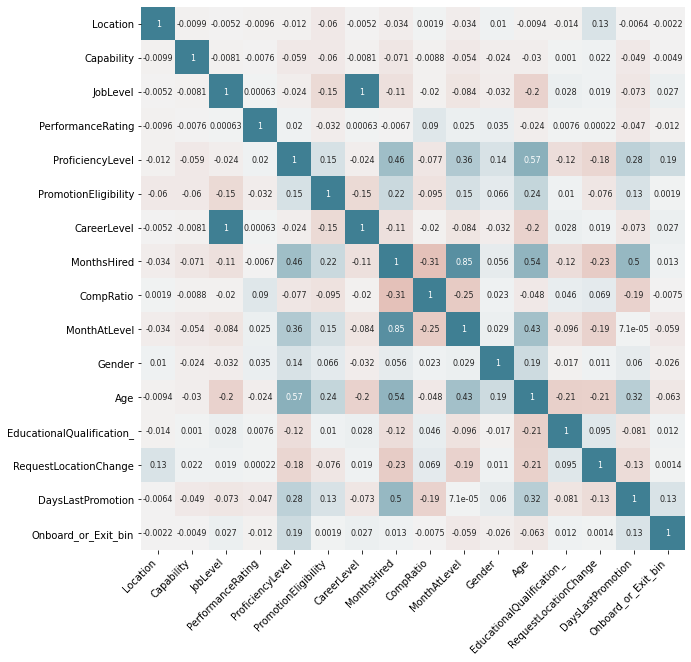

In [ ]:
corr_matrix = df2.corr(method='pearson')

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [ ]:
df2.drop(
    labels = (['CareerLevel', 'MonthAtLevel']),
    axis = 1,
    inplace = True
)

In [ ]:
X = df2.drop(columns = ['Onboard_or_Exit_bin' ], inplace=False)
y = np.asarray(df2['Onboard_or_Exit_bin'])

## División de Entrenamiento/test

In [ ]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 123
                                    )

In [ ]:
# Se identifica el nombre de las columnas numéricas
#cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int', 'int64']).columns.to_list()

In [ ]:
# Convertir el output del ColumnTransformer en dataframe y añadir el nombre de las columnas
# ------------------------------------------------------------------------------
# Nombre de todas las columnas
#encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
#labels = np.concatenate([numeric_cols, encoded_cat])



In [ ]:
# Conversión a dataframe
#X_train_prep = pd.DataFrame(X_train_prep.toarray(), columns=labels)
#X_test_prep  = pd.DataFrame(X_test_prep.toarray(), columns=labels)
#X_train_prep.info()

## Escalado de variables

In [ ]:
from sklearn.preprocessing import scale
cat_cols = df2.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = df2.select_dtypes(include=['float64', 'int', 'int64']).columns.to_list()
labels = np.concatenate([numeric_cols, cat_cols])
df2 = pd.DataFrame(scale(df2), columns = labels )

In [ ]:
df2.head()

,Location,Capability,JobLevel,PerformanceRating,ProficiencyLevel,PromotionEligibility,MonthsHired,CompRatio,Gender,Age,EducationalQualification_,RequestLocationChange,DaysLastPromotion,Onboard_or_Exit_bin
0,0.055195,0.659154,0.56116,-0.438133,-0.258798,-0.586503,0.417670,-0.086193,0.582471,-0.591467,0.961385,-0.530297,0.979103,-0.228276
1,-0.862912,-0.083000,-0.44685,-0.438133,-1.012531,-0.586503,-0.091923,-0.086193,0.582471,-0.591467,0.961385,-0.530297,-0.754390,-0.228276
2,1.891408,0.659154,-0.44685,-0.438133,-1.766264,1.999288,-0.679915,-0.086193,-1.716824,-1.028696,-0.207232,1.885735,0.312375,-0.228276
3,1.891408,0.659154,-0.44685,-0.438133,-1.012531,1.999288,-0.679915,-0.086193,0.582471,-0.591467,-1.375849,-0.530297,-1.021081,-0.228276
4,-0.862912,-1.814691,0.56116,-0.438133,-0.258798,-0.586503,1.123260,-0.086193,-1.716824,0.282991,-1.375849,-0.530297,0.979103,-0.228276


In [ ]:
df2.tail()

,Location,Capability,JobLevel,PerformanceRating,ProficiencyLevel,PromotionEligibility,MonthsHired,CompRatio,Gender,Age,EducationalQualification_,RequestLocationChange,DaysLastPromotion,Onboard_or_Exit_bin
35550,-0.862912,0.659154,-1.958865,-0.438133,1.248668,0.706392,-0.013524,2.203663,0.582471,0.501605,-0.207232,-0.530297,-0.354353,4.380666
35551,-0.862912,0.659154,1.065165,-0.438133,1.248668,0.706392,-0.601516,-0.467836,0.582471,1.157448,-0.207232,-0.530297,0.979103,4.380666
35552,1.891408,0.659154,-1.958865,-0.438133,1.248668,-0.586503,-0.640716,-1.231121,0.582471,0.720219,-0.207232,1.885735,-0.754390,4.380666
35553,-0.862912,0.659154,0.561160,-0.438133,-0.258798,-0.586503,-0.562317,0.804307,0.582471,-0.372853,-1.375849,1.885735,-0.754390,4.380666
35554,-0.862912,-0.083000,0.561160,-0.438133,-0.258798,-0.586503,-0.719115,-1.103907,0.582471,-0.591467,0.961385,-0.530297,-0.754390,4.380666


## Modelo de arbol (gini)

In [ ]:
# Creación del modelo de Arbol
# ------------------------------------------------------------------------------
model_tree = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model_tree.fit(X_train, y_train)

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 8))

print(f"Profundidad del árbol: {model_tree.get_depth()}")
print(f"Número de nodos terminales: {model_tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_tree,
            feature_names = labels.tolist(),
            class_names   = 'attrition',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )


In [ ]:
import graphviz 

df2_feat = (['Location', 'Capability', 'JobLevel', 'PerformanceRating',
       'ProficiencyLevel', 'PromotionEligibility', 'MonthsHired', 'CompRatio',
       'Gender', 'Age', 'EducationalQualification_', 'RequestLocationChange',
       'DaysLastPromotion'])
df2_target = (['Onboard', 'Exit'])

model_tree = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )
model_tree.fit(X_train, y_train)

#dot_data = tree.export_graphviz(model_tree, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("att") 

dot_data = tree.export_graphviz(model_tree, out_file=None, 
                      feature_names=df2_feat,  
                      class_names=df2_target,
                      label='all',
                      leaves_parallel = True,
                      proportion = True,  
                      filled = True, 
                      rounded = True,  
                      special_characters = True)  
graph = graphviz.Source(dot_data)  
graph.render("attrition")
files.download('attrition.pdf')

## Modelo de Arbol (Ensemble)

In [ ]:
# Creación del modelo de Arbol utilizando Ensemble (BaggingClassifier)
# ------------------------------------------------------------------------------
model_tree_ensemble = BaggingClassifier(
    DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          ),
    n_estimators = 10,
    random_state = 0
)

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model_tree_ensemble.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
    

In [ ]:
model_tree_ensemble.oob_score

False

In [ ]:
dot_data = tree.export_graphviz(model_tree_ensemble, out_file=None, 
                      feature_names=df2_feat,  
                      class_names=df2_target,
                      label='all',
                      leaves_parallel = True,
                      proportion = True,  
                      filled = True, 
                      rounded = True,  
                      special_characters = True)  
graph = graphviz.Source(dot_data)  
graph.render("attrition2")
files.download('attrition2.pdf')

AttributeError: ignored

## Regresión logística

In [ ]:
# Creación del modelo de Regresión Logística (LogisticRegression)
# ------------------------------------------------------------------------------
model_log_reg = LogisticRegression(random_state=123, class_weight=None)

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model_log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
import statsmodels.api as sm

x_train = sm.add_constant(X_train, prepend=True)
modelo_log_reg = sm.Logit(endog=y_train, exog=x_train,)
modelo_log_reg = modelo_log_reg.fit()
print(modelo_log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.155307
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                26666
Model:                          Logit   Df Residuals:                    26654
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Jun 2021   Pseudo R-squ.:                  0.2109
Time:                        18:06:25   Log-Likelihood:                -4141.4
converged:                       True   LL-Null:                       -5248.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.3293      0.167    -19.955      0.000      -3.

## Regresión logística balanceada

In [ ]:
# Probamos la regresión logística pero poniendole pesos 
# para compensar el desbalanceo del dataset

# definir pesos de clase 
w = {0: 5, 1:95}

# Creación del modelo de Regresión Logística con pesos (LogisticRegression)
# ------------------------------------------------------------------------------
model_log_reg_w = LogisticRegression(random_state=123, class_weight=w)

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model_log_reg_w.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 5, 1: 95}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Resutlados de los modelos

In [ ]:
# Calculamos las tablas de contingencia y los valores de accuracy de cada modelo
# ------------------------------------------------------------------------------

In [ ]:
predicciones_tree = model_tree.predict(X = X_test)
tree_conf_mat = confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones_tree
)
mat_cost = np.array([[-1, 100], [1,0]])
(tree_conf_mat*mat_cost).sum()

280

In [ ]:

# Error de test del modelo Arbol
#-------------------------------------------------------------------------------
predicciones_tree = model_tree.predict(X = X_test,)

print("Matriz de confusión del modelo Arbol")
print("------------------------------------")
print(confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones_tree
))

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_tree,
            normalize = True
           )
print(f"El accuracy de test del modelo Arbol es: {100 * accuracy} %")
print(f'Area Under Curve (AUC): {roc_auc_score (y_test , predicciones_tree)} ') 
print(f'Recall: {recall_score (y_test, predicciones_tree)}')
print(" ")

# Error de test del modelo Arbol Ensemble
#-------------------------------------------------------------------------------
predicciones_tree_ense = model_tree_ensemble.predict(X = X_test,)

print("Matriz de confusión del modelo Arbol Ensemble")
print("---------------------------------------------")
print(confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones_tree_ense
))

accuracy_tree_ense = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_tree_ense,
            normalize = True
           )
print(f"El accuracy de test del modelo Arbol Ensemble es: {100 * accuracy_tree_ense} %")
print(f'Area Under Curve (AUC): {roc_auc_score (y_test , predicciones_tree_ense)} ') 
print(f'Recall: {recall_score (y_test, predicciones_tree_ense)}')
print(" ")

# Error de test del modelo Regresión logística
#-------------------------------------------------------------------------------
predicciones_log_reg = model_log_reg.predict(X = X_test,)
print("Matriz de confusión del modelo Regesión logística")
print("---------------------------------------------")
print(confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones_log_reg
))

accuracy_log_reg = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_log_reg,
            normalize = True
           )
print(f"El accuracy de test del modelo Regresión logística es: {100 * accuracy_log_reg} %")
print(f'Area Under Curve (AUC): {roc_auc_score (y_test , predicciones_log_reg)} ') 
print(f'Recall: {recall_score (y_test, predicciones_log_reg)}')
print(" ")

# Error de test del modelo Regresión logística con pesos
#-------------------------------------------------------------------------------
predicciones_log_reg_w = model_log_reg_w.predict(X = X_test,)
print("Matriz de confusión del modelo Regesión logística con pesos")
print("--------------------------------------------------")
print(confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones_log_reg_w
))

accuracy_log_reg_w = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_log_reg_w,
            normalize = True
           )
print(f"El accuracy de test del modelo Regresión logística con pesos es: {100 * accuracy_log_reg} %")
print(f'Area Under Curve (AUC): {roc_auc_score (y_test , predicciones_log_reg_w)} ') 
print(f'Recall: {recall_score (y_test, predicciones_log_reg_w)}')
print(" ")


Matriz de confusión del modelo Arbol
------------------------------------
[[8362   84]
 [ 242  201]]
El accuracy de test del modelo Arbol es: 96.33254584317696 %
Area Under Curve (AUC): 0.7218895343087863 
Recall: 0.45372460496614
 
Matriz de confusión del modelo Arbol Ensemble
---------------------------------------------
[[8378   68]
 [ 243  200]]
El accuracy de test del modelo Arbol Ensemble es: 96.50129373382833 %
Area Under Curve (AUC): 0.7217080600751875 
Recall: 0.45146726862302483
 
Matriz de confusión del modelo Regesión logística
---------------------------------------------
[[8416   30]
 [ 349   94]]
El accuracy de test del modelo Regresión logística es: 95.7363032962088 %
Area Under Curve (AUC): 0.604318819492738 
Recall: 0.21218961625282168
 
Matriz de confusión del modelo Regesión logística con pesos
--------------------------------------------------
[[6656 1790]
 [ 135  308]]
El accuracy de test del modelo Regresión logística con pesos es: 95.7363032962088 %
Area Under C

In [ ]:
#Generamos las curvas ROC y de Sensibilidad/Recall

# Predecimos las probabilidades
lr_probs_tree = model_tree.predict_proba(X_test)
lr_probs_tree_ense = model_tree_ensemble.predict_proba(X_test)
lr_probs_log_reg = model_log_reg.predict_proba(X_test)
lr_probs_log_reg_w = model_log_reg_w.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de predecir 1)
lr_probs_tree = lr_probs_tree[:, 1]
lr_probs_tree_ense = lr_probs_tree_ense[:, 1]
lr_probs_log_reg = lr_probs_log_reg[:, 1]
lr_probs_log_reg_w = lr_probs_log_reg_w[:, 1]

Sin entrenar: ROC AUC=0.500
Arbol común: ROC AUC=0.841
Arbol con Ensemble: ROC AUC=0.860
Regresión logística: ROC AUC=0.824
Regresión logística ponderada: ROC AUC=0.832


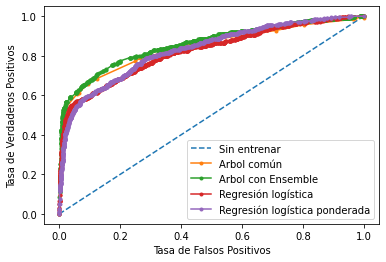

In [ ]:
#Generamos las curvas ROC 

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc_tree = roc_auc_score(y_test, lr_probs_tree)
lr_auc_tree_ense = roc_auc_score(y_test, lr_probs_tree_ense)
lr_auc_log_reg = roc_auc_score(y_test, lr_probs_log_reg)
lr_auc_log_reg_w = roc_auc_score(y_test, lr_probs_log_reg_w)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Arbol común: ROC AUC=%.3f' % (lr_auc_tree))
print('Arbol con Ensemble: ROC AUC=%.3f' % (lr_auc_tree_ense))
print('Regresión logística: ROC AUC=%.3f' % (lr_auc_log_reg))
print('Regresión logística ponderada: ROC AUC=%.3f' % (lr_auc_log_reg_w))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr_tree, lr_tpr_tree, _ = roc_curve(y_test, lr_probs_tree)
lr_fpr_tree_ense, lr_tpr_tree_ense, _ = roc_curve(y_test, lr_probs_tree_ense)
lr_fpr_log_reg, lr_tpr_log_reg, _ = roc_curve(y_test, lr_probs_log_reg)
lr_fpr_log_reg_w, lr_tpr_log_reg_w, _ = roc_curve(y_test, lr_probs_log_reg_w)
# Pintamos las curvas ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr_tree, lr_tpr_tree, marker='.', label='Arbol común')
plt.plot(lr_fpr_tree_ense, lr_tpr_tree_ense, marker='.', label='Arbol con Ensemble')
plt.plot(lr_fpr_log_reg, lr_tpr_log_reg, marker='.', label='Regresión logística')
plt.plot(lr_fpr_log_reg_w, lr_tpr_log_reg_w, marker='.', label='Regresión logística ponderada')
# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

Arbol: f1=0.552 auc=0.403
Arbol Ensemble: f1=0.563 auc=0.529
Regresión logística: f1=0.332 auc=0.444
Regresión logística ponderada: f1=0.242 auc=0.388


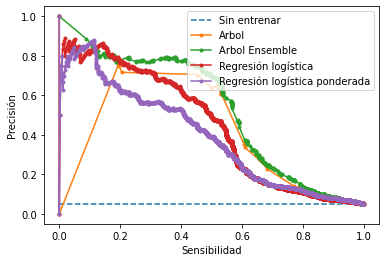

In [ ]:
#Generamos las curvas Precisión - Sensibilidad/Recall

# Sacamos los valores
yhat_tree = model_tree.predict(X_test)
yhat_tree_ense = model_tree_ensemble.predict(X_test)
yhat_log_reg = model_log_reg.predict(X_test)
yhat_log_reg_w = model_log_reg_w.predict(X_test)
lr_precision_tree, lr_recall_tree, _ = precision_recall_curve(y_test, lr_probs_tree)
lr_precision_tree_ense, lr_recall_tree_ense, _ = precision_recall_curve(y_test, lr_probs_tree_ense)
lr_precision_log_reg, lr_recall_log_reg, _ = precision_recall_curve(y_test, lr_probs_log_reg)
lr_precision_log_reg_w, lr_recall_log_reg_w, _ = precision_recall_curve(y_test, lr_probs_log_reg_w)
lr_f1_tree, lr_auc_tree = f1_score(y_test, yhat_tree), auc(lr_recall_tree, lr_precision_tree)
lr_f1_tree_ense, lr_auc_tree_ense = f1_score(y_test, yhat_tree_ense), auc(lr_recall_tree_ense, lr_precision_tree_ense)
lr_f1_log_reg, lr_auc_log_reg = f1_score(y_test, yhat_log_reg), auc(lr_recall_log_reg, lr_precision_log_reg)
lr_f1_log_reg_w, lr_auc_log_reg_w = f1_score(y_test, yhat_log_reg_w), auc(lr_recall_log_reg_w, lr_precision_log_reg_w)
# Resumimos s
print('Arbol: f1=%.3f auc=%.3f' % (lr_f1_tree, lr_auc_tree))
print('Arbol Ensemble: f1=%.3f auc=%.3f' % (lr_f1_tree_ense, lr_auc_tree_ense))
print('Regresión logística: f1=%.3f auc=%.3f' % (lr_f1_log_reg, lr_auc_log_reg))
print('Regresión logística ponderada: f1=%.3f auc=%.3f' % (lr_f1_log_reg_w, lr_auc_log_reg_w))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall_tree, lr_precision_tree, marker='.', label='Arbol')
plt.plot(lr_recall_tree_ense, lr_precision_tree_ense, marker='.', label='Arbol Ensemble')
plt.plot(lr_recall_log_reg, lr_precision_log_reg, marker='.', label='Regresión logística')
plt.plot(lr_recall_log_reg_w, lr_precision_log_reg_w, marker='.', label='Regresión logística ponderada')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Otros Gráficos

In [ ]:
df_attrition

,Location,Capability,JobLevel,PerformanceRating,ProficiencyLevel,PromotionEligibility,CareerLevel,MonthsHired,CompRatio,MonthAtLevel,Gender,Age,EducationalQualification_,RequestLocationChange,DaysLastPromotion,Onboard_or_Exit_bin
id1,,,,,,,,,,,,,,,,
1,GURGAON,SAP,SSE,CSAPG,P2 - PROFICIENT,ELIGIBLE,SSE,72,0.95,37,M,27,IT,No,2853,0
2,BANGALORE,MICROSOFT PLATFORM,SE,CSAPG,P1 - NOVICE,ELIGIBLE,SE,59,0.95,48,M,27,IT,No,2123,0
3,PUNE,SAP,SE,CSAPG,P0 - TRAINED,UNKNOWN,SE,44,0.95,15,F,25,ENGINEERING,Yes,2672,0
4,PUNE,SAP,SE,CSAPG,P1 - NOVICE,UNKNOWN,SE,44,0.95,39,M,27,BUSINNES/ECON/SOCIALS,No,1942,0
5,BANGALORE,HOSTCENTRIC PLATFORM,SSE,CSAPG,P2 - PROFICIENT,ELIGIBLE,SSE,90,0.95,55,F,31,BUSINNES/ECON/SOCIALS,No,2853,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35551,BANGALORE,SAP,AM,CSAPG,P4 - EXPERT,NOT ELIGI,AM,61,1.13,38,M,32,ENGINEERING,No,2488,1
35552,BANGALORE,SAP,TL,CSAPG,P4 - EXPERT,NOT ELIGI,TL,46,0.92,10,M,35,ENGINEERING,No,2853,1
35553,PUNE,SAP,AM,CSAPG,P4 - EXPERT,ELIGIBLE,AM,45,0.86,33,M,33,ENGINEERING,Yes,2123,1


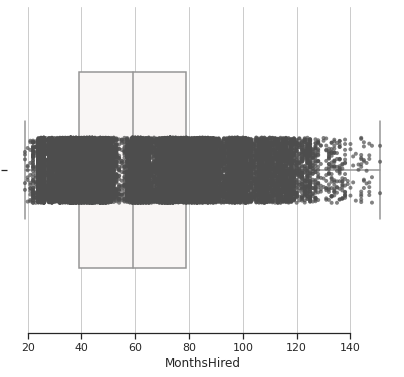

In [ ]:
df_num1 = df_attrition.select_dtypes(include= (['float64', 'int64']))

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="MonthsHired", data=df_attrition,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="MonthsHired", data=df_attrition,
              size=4, color=".3", linewidth=0, alpha = 0.7)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

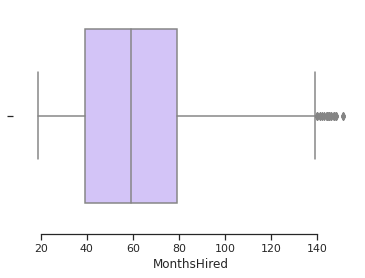

In [ ]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="MonthsHired",
            hue="Onboard_or_Exit_bin", palette=["m", "g"],
            data=df_attrition)
sns.despine(offset=10, trim=True)

In [ ]:

df_attrition["VALOR_CUANTILES"] = pd.qcut(df.Month, 5)
df.boxplot(column="INDICE_CRIMEN", by="VALOR_CUANTILES",
	figsize=(8,6))
plt.show()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
